模型的准确率为: 0.92


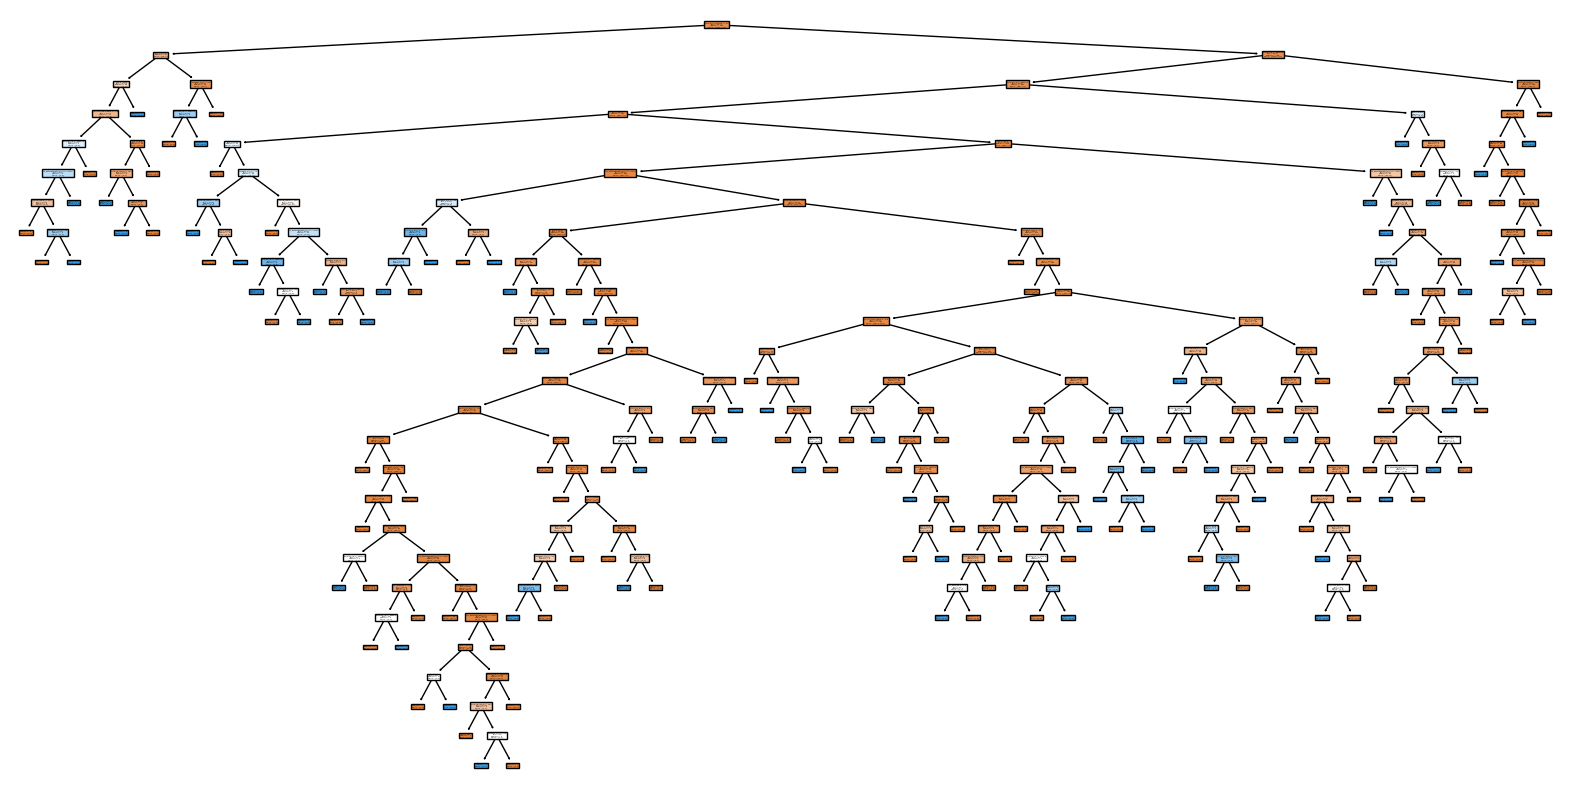

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 读取 CSV 文件
df = pd.read_csv("modified_aug_train.csv")

# 删除含有 NaN 的行
df1 = df.dropna().copy()

# 对非数值型数据进行编码
label_encoders = {}
for column in df1.columns[:-1]:  # 遍历特征列
    if df1[column].dtype == "object":  # 如果是非数值型数据
        le = LabelEncoder()
        df1.loc[:, column] = le.fit_transform(df1.loc[:, column])
        label_encoders[column] = le  # 将 LabelEncoder 存储在字典中，以备后续使用

# 将标签和特征分开
X = df1.iloc[:, :-1]  # 所有特征
y = df1.iloc[:, -1]  # 标签

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 构建随机森林模型
model = RandomForestClassifier(random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上评估模型
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"模型的准确率为: {accuracy:.2f}")

# 选择随机森林中的一棵决策树
tree_in_forest = model.estimators_[0]  # 获取第一棵决策树

# 使用 plot_tree 绘制决策树图
plt.figure(figsize=(20, 10))

# 转换 feature_names 参数为 list 类型
feature_names_list = df1.columns[:-1].tolist()

# 绘制决策树图
tree.plot_tree(tree_in_forest, feature_names=feature_names_list, filled=True)

# 保存图为 PDF 文件
plt.savefig("decision_tree.pdf", format="pdf")

# 显示图
plt.show()

In [20]:
import numpy as np

print("\n编码与原始特征值的对应关系：")
for feature, encoder in label_encoders.items():
    # 获取特征的编码后的值和原始特征值
    encoded_values = np.arange(len(encoder.classes_))
    original_values = encoder.inverse_transform(encoded_values)

    # 打印特征名称、编码后的值和原始特征值之间的对应关系
    print(f"特征: {feature}")
    print("编码后的值 -> 原始特征值:")
    for encoded_value, original_value in zip(encoded_values, original_values):
        print(f"{encoded_value} -> {original_value}")
    print("\n")


编码与原始特征值的对应关系：
特征: city
编码后的值 -> 原始特征值:
0 -> 上海市
1 -> 云南省
2 -> 内蒙古自治区
3 -> 北京市
4 -> 台湾省
5 -> 吉林省
6 -> 四川省
7 -> 天津市
8 -> 宁夏回族自治区
9 -> 安徽省
10 -> 山东省
11 -> 山西省
12 -> 广东省
13 -> 广西壮族自治区
14 -> 新疆维吾尔自治区
15 -> 江苏省
16 -> 江西省
17 -> 河北省
18 -> 河南省
19 -> 浙江省
20 -> 海南省
21 -> 湖北省
22 -> 湖南省
23 -> 澳门特别行政区
24 -> 甘肃省
25 -> 福建省
26 -> 西藏自治区
27 -> 贵州省
28 -> 辽宁省
29 -> 重庆市
30 -> 陕西省
31 -> 青海省
32 -> 香港特别行政区
33 -> 黑龙江省


特征: gender
编码后的值 -> 原始特征值:
0 -> 女
1 -> 男


特征: relevent_experience
编码后的值 -> 原始特征值:
0 -> 无相关经验
1 -> 有相关经验


特征: enrolled_university
编码后的值 -> 原始特征值:
0 -> 全日制
1 -> 无
2 -> 非全日制


特征: education_level
编码后的值 -> 原始特征值:
0 -> 专科
1 -> 本科
2 -> 硕士
3 -> 高中


特征: major_discipline
编码后的值 -> 原始特征值:
0 -> 其他
1 -> 医学
2 -> 历史学
3 -> 哲学
4 -> 工程学
5 -> 教育学
6 -> 文学
7 -> 无主修
8 -> 理学
9 -> 管理学
10 -> 经济学
11 -> 艺术学


特征: experience
编码后的值 -> 原始特征值:
0 -> 1
1 -> 10
2 -> 11
3 -> 12
4 -> 13
5 -> 14
6 -> 15
7 -> 16
8 -> 17
9 -> 18
10 -> 19
11 -> 2
12 -> 20
13 -> 3
14 -> 4
15 -> 5
16 -> 6
17 -> 7
18 -> 8
19 -> 9
20 -> <1
21 -> >20
